In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [9]:
train=pd.read_csv("../input/newtrain_w2v_t128.txt",header=None)
train.columns=['ID','topic','cnt']
train = pd.pivot_table(train, values='cnt', index=['ID'],
               columns=['topic'], aggfunc=np.sum)
train.shape

(3315, 129)

In [10]:
test=pd.read_csv("../input/newtest_w2v_t128.txt",header=None)
test.columns=['ID','topic','cnt']
test = pd.pivot_table(test, values='cnt', index=['ID'],
               columns=['topic'], aggfunc=np.sum)
test.shape

(5667, 129)

In [11]:
(test.columns==train.columns).all()

True

In [15]:
joined=pd.concat([train,test])
joined.shape

(8982, 129)

In [16]:
idf=np.log(1/(joined>0).mean())

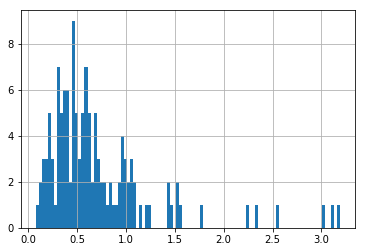

topic
 96     0.077402
 15     0.113658
 46     0.137771
 40     0.149338
 62     0.157645
 104    0.168655
 38     0.173145
 42     0.174337
 61     0.180853
 39     0.213394
 60     0.222253
 120    0.222949
 97     0.225735
 20     0.226573
 122    0.238796
 92     0.261240
 41     0.261385
 82     0.279183
 98     0.297003
 113    0.299103
 57     0.305732
 101    0.308608
-1      0.311948
 103    0.311948
 9      0.320655
 44     0.327428
 105    0.338925
 102    0.344408
 43     0.349449
 17     0.350396
          ...   
 119    0.960333
 109    0.963246
 55     0.975573
 76     0.979420
 73     0.981497
 22     0.990750
 71     0.992851
 65     1.029887
 72     1.036143
 26     1.058993
 29     1.061243
 78     1.064143
 69     1.079753
 32     1.103635
 23     1.138127
 48     1.210899
 64     1.234341
 5      1.416816
 18     1.430220
 50     1.463817
 28     1.521768
 27     1.533050
 77     1.561295
 79     1.785765
 31     2.238130
 114    2.329897
 115    2.554759
 87     

In [17]:
idf.hist(bins=100);plt.show()
idf.sort_values()

In [18]:
train_tfidf=train*idf

In [31]:
train_tfidf[train_tfidf==0]=np.nan
train_tfidf.columns=['t128_'+str(u) for u in train_tfidf.columns]

In [33]:
train_tfidf.to_csv("../input/newtrain_topic_tfidf.csv")

In [34]:
train_tfidf.shape

(3315, 129)

In [23]:
test_tfidf=test*idf

In [35]:
test_tfidf[test_tfidf==0]=np.nan
test_tfidf.columns=['t128_'+str(u) for u in test_tfidf.columns]

In [36]:
test_tfidf.to_csv("../input/newtest_topic_tfidf.csv")

In [37]:
test_tfidf.shape

(5667, 129)

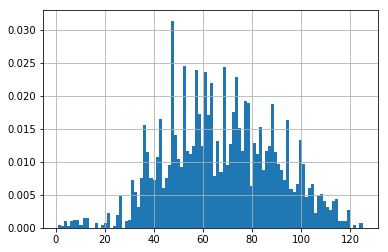

In [38]:
(train_tfidf>0).sum(1).hist(bins=100,normed=True)

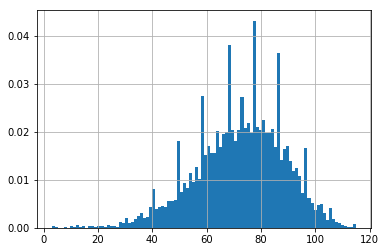

In [39]:
(test_tfidf>0).sum(1).hist(bins=100,normed=True)